In [10]:
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Квантовая карта признаков:


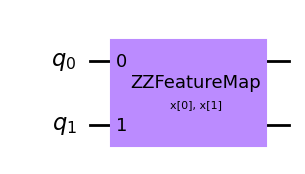

In [12]:
# Подготовка данных
X, y = make_moons(n_samples=100, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Предобработка данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Определяем квантовую карту признаков
feature_map = ZZFeatureMap(feature_dimension=2, reps=2)

# Визуализация квантовой карты признаков
print("Квантовая карта признаков:")
feature_map.draw("mpl")

In [13]:
# Определяем квантовое ядро
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=Aer.get_backend('statevector_simulator'))

# Квантовый классификатор SVC
qsvc = QSVC(quantum_kernel=quantum_kernel)

# Обучение модели
qsvc.fit(X_train, y_train)

# Оценка модели
accuracy = qsvc.score(X_test, y_test)
print("Точность квантового SVC:", accuracy)

Точность квантового SVC: 0.65
